#### Чернышова Дана, группа 6209
##### Вариант 21 (21 mod 10 = 1)
##### Лабораторная работа №4

In [3]:
import sympy as sp
import numpy as np

Задание 1. Используя интерполяционную формулу Лагранжа для неравноотстоящих узлов (а)построить многочлен Лагранжа
(вывести формулу), (б)вывести график, (в)вычислить значения функции при данных значениях аргумента.

In [48]:
X = [0.43, 0.48, 0.55, 0.62, 0.70, 0.75]
y = [1.6359, 1.73234, 1.87686, 2.03345, 2.22846, 2.35973]

x = sp.Symbol('x')

func = []

for ind in range(len(X)):
    numerator = np.dot(y[ind], np.prod([(x-i) for i in (y[:ind] + y[ind+1:])]))
    denominator = np.prod([X[ind]-i for i in (X[:ind] + X[ind+1:])])
    func.append(numerator/denominator)

func = sp.expand(sum(func))

print(func)

1.15248681985395*x**5 - 7.77221126726363*x**4 + 37.8172183535062*x**3 - 35.0439767725766*x**2 + 22.1249822163954*x - 9.31322574615479e-10


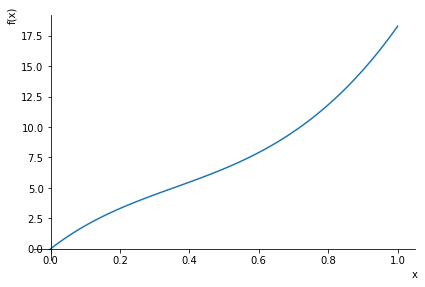

In [47]:
A = sp.plot(func, (x, 0, 1))

In [46]:
val = [0.702, 0.512, 0.645, 0.736, 0.608]

print([func.subs(x, i) for i in val])

[9.65368705954408, 6.72361100720955, 8.62263679501684, 10.3463504167344, 8.03079760157782]


Задание 2. Используя первую или вторую интерполяционную формулу Ньютона вычислить указанные значения функции при данных
значениях аргумента.

In [74]:
def get_closest(array, values):
    idxs = np.searchsorted(array, values, side="right")
    prev_idx_is_less = ((idxs == len(array)) | (np.fabs(values - array[np.maximum(idxs-1, 0)]) < np.fabs(values - array[np.minimum(idxs, len(array)-1)])))
    idxs[prev_idx_is_less] -= 1
    return idxs

In [79]:
def Newton_interpolation1(x, y, x8, n):
    yd1 = np.array([y[i+1] - y[i] for i in range(n - 1)])
    yd2 = np.array([yd1[i+1] - yd1[i] for i in range(n - 2)])
    yd3 = np.array([yd2[i+1] - yd2[i] for i in range(n - 3)])
    print(yd3)
    y8 = np.zeros(len(x8), dtype=float)
    h = x[1] - x[0]
    indexes = get_closest(x, x8)
    print(indexes)
    for i in range(len(x8)):
        if indexes[i] <= len(x)/2:       # forward interpolation
            t = (x8[i] - x[indexes[i]])/h
            y8[i] = y[indexes[i]] + t*yd1[indexes[i]] + t*(t-1)*yd2[indexes[i]]/2 + t*(t-1)*(t-2)*yd3[indexes[i]]/6
        else:                            # back interpolation
            t = (x8[i] - x[indexes[i]])/h
            y8[i] = y[indexes[i]] + t*yd1[indexes[i]-1] + t*(t-1)*yd2[indexes[i]-2]/2 + t*(t-1)*(t-2)*yd3[indexes[i]-3]/6
    return y8

In [104]:
def Newton_interpolation(X, y, x, n):

    yd = []

    for i in range(3):
        yd.append(np.array([y[j+1] - y[j] for j in range(n - 1 - i)]))


    # yd1 = np.array([y[i+1] - y[i] for i in range(n - 1)])
    # yd2 = np.array([yd1[i+1] - yd1[i] for i in range(n - 2)])
    # yd3 = np.array([yd2[i+1] - yd2[i] for i in range(n - 3)])
    y8 = np.zeros(len(x), dtype=float)
    h = X[1] - X[0]
    indexes = get_closest(X, x)
    for i in range(len(x)):
        t = (x[i] - X[indexes[i]])/h
        if indexes[i] <= len(X)/2:       # forward interpolation
            y8[i] = y[indexes[i]] + t*yd[0][indexes[i]] + t*(t-1)*yd[1][indexes[i]]/2 + t*(t-1)*(t-2)*yd[2][indexes[i]]/6
        else:                            # back interpolation
            y8[i] = y[indexes[i]] + t*yd[0][indexes[i]-1] + t*(t-1)*yd[1][indexes[i]-2]/2 + t*(t-1)*(t-2)*yd[2][indexes[i]-3]/6
    
    return y8

In [105]:
np.set_printoptions(precision=3, suppress=True) # set precision for linspace


N = 11 # number of samples to generate
X = np.linspace(1.415, 1.465, num=N)
print(f'\ndefault x:\n{X}')

np.set_printoptions(precision=18) # reset precision

y = np.array([0.888551, 0.889599, 0.890637, 0.891667, 0.892687, 0.893698, 0.894700, 0.895693, 0.896677, 0.897653, 0.898619])
print(f'\ndefault y:\n{y}')

x = np.array([1.4161, 1.4625, 1.4135, 1.470])

print(f'\ninterpolated:\n{Newton_interpolation(X, y, x, N)}')


default x:
[1.415 1.42  1.425 1.43  1.435 1.44  1.445 1.45  1.455 1.46  1.465]

default y:
[0.888551 0.889599 0.890637 0.891667 0.892687 0.893698 0.8947   0.895693
 0.896677 0.897653 0.898619]

interpolated:
[0.888744993184     0.8980800625       0.8882842839999999
 0.8995849999999999]
